# Import all the required libraries

---



In [54]:
pip install pandas matplotlib yfinance numpy tensorflow


^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [ ]:


START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [ ]:
data = load_data('TCS.NS')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04 00:00:00+00:00,287.620789,375.825012,379.450012,374.524994,377.399994,1963682
1,2010-01-05 00:00:00+00:00,287.697388,375.924988,379.774994,373.274994,377.500000,2014488
2,2010-01-06 00:00:00+00:00,281.192322,367.424988,376.100006,366.500000,375.924988,3349176
3,2010-01-07 00:00:00+00:00,273.367096,357.200012,369.700012,355.500000,367.750000,6474892
4,2010-01-08 00:00:00+00:00,267.780396,349.899994,359.250000,348.250000,358.000000,6048178


In [ ]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

C:\Users\sanut\AppData\Local\Temp\ipykernel_8820\1616842492.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Adj Close'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,375.825012,379.450012,374.524994,377.399994,1963682
1,375.924988,379.774994,373.274994,377.500000,2014488
2,367.424988,376.100006,366.500000,375.924988,3349176
3,357.200012,369.700012,355.500000,367.750000,6474892
4,349.899994,359.250000,348.250000,358.000000,6048178


Visualizing Closing Price

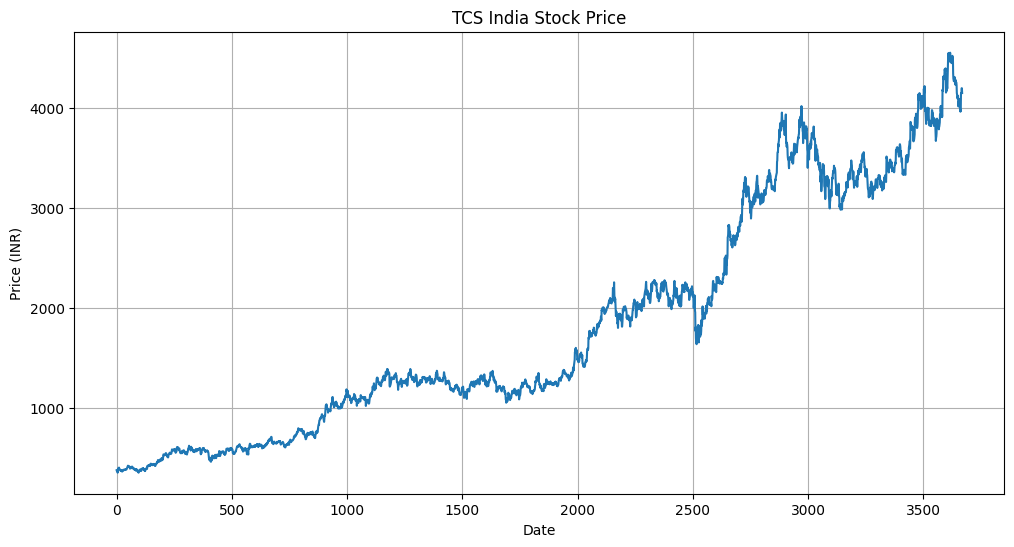

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [ ]:
df

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,375.825012,379.450012,374.524994,377.399994,1963682
1,375.924988,379.774994,373.274994,377.500000,2014488
2,367.424988,376.100006,366.500000,375.924988,3349176
3,357.200012,369.700012,355.500000,367.750000,6474892
4,349.899994,359.250000,348.250000,358.000000,6048178
...,...,...,...,...,...
3664,4150.899902,4205.799805,4085.050049,4169.700195,3724349
3665,4147.000000,4169.750000,4117.649902,4155.000000,1648039
3666,4198.700195,4234.299805,4117.649902,4128.200195,1406487


# Plotting moving averages of 100 day

---



In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3664,4218.291992
3665,4221.610991
3666,4225.580994
3667,4229.682493


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

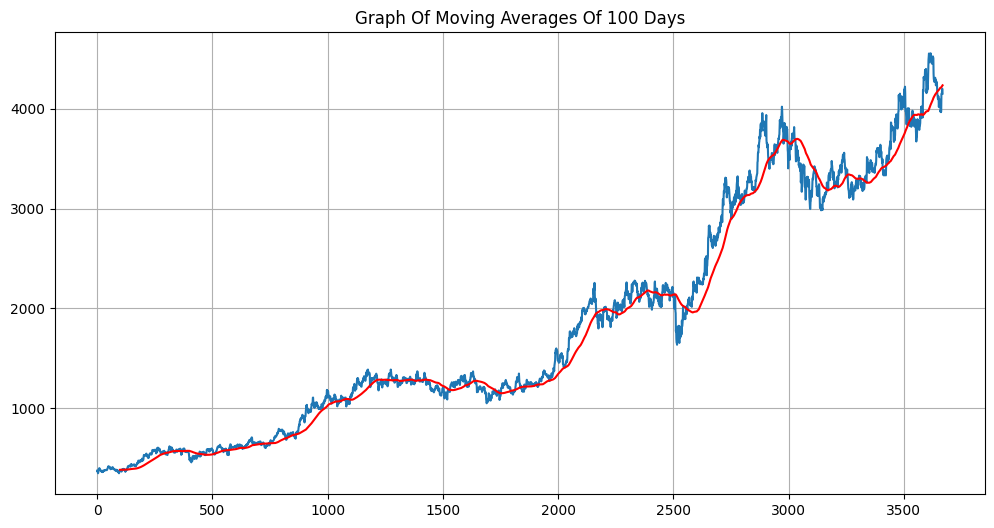

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3664,4080.272749
3665,4081.701249
3666,4083.271749
3667,4084.745748


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

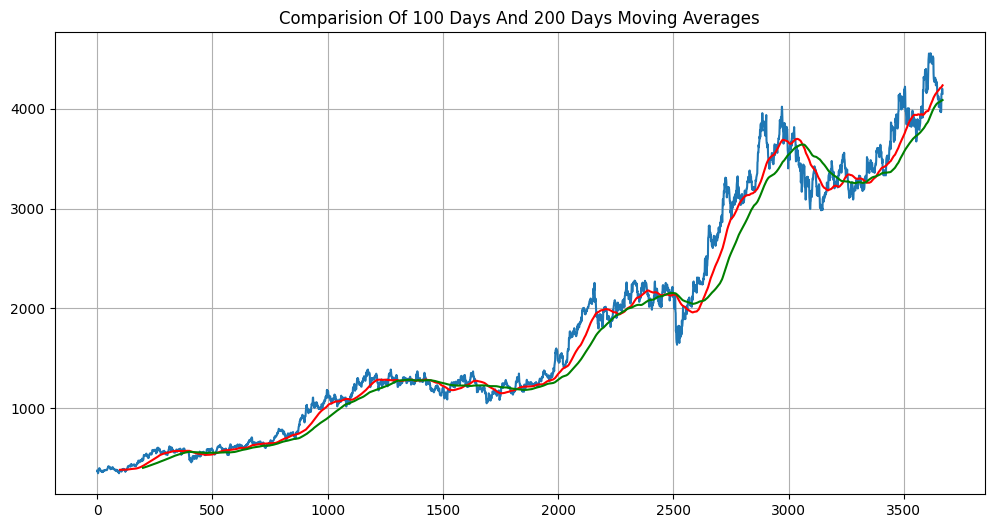

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [ ]:
df.shape

(3669, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [ ]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2568, 7)
(1101, 7)


In [ ]:
train.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04 00:00:00+00:00,287.620789,375.825012,379.450012,374.524994,377.399994,1963682
1,2010-01-05 00:00:00+00:00,287.697388,375.924988,379.774994,373.274994,377.500000,2014488
2,2010-01-06 00:00:00+00:00,281.192322,367.424988,376.100006,366.500000,375.924988,3349176
3,2010-01-07 00:00:00+00:00,273.367096,357.200012,369.700012,355.500000,367.750000,6474892
4,2010-01-08 00:00:00+00:00,267.780396,349.899994,359.250000,348.250000,358.000000,6048178


In [ ]:
test.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
2568,2020-06-09 00:00:00+00:00,1912.113525,2072.050049,2095.500000,2060.250000,2063.100098,2909439
2569,2020-06-10 00:00:00+00:00,1945.980713,2108.750000,2132.000000,2073.500000,2077.050049,5168397
2570,2020-06-11 00:00:00+00:00,1908.052979,2067.649902,2105.000000,2061.800049,2100.000000,2269513
2571,2020-06-12 00:00:00+00:00,1882.075928,2039.500000,2049.199951,2011.000000,2011.199951,2842642
2572,2020-06-15 00:00:00+00:00,1873.216919,2029.900024,2059.000000,2000.949951,2039.099976,2399022


# Using MinMax scaler for normalization of the dataset

---



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [ ]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01671754],
       [0.01606246],
       [0.01251195],
       ...,
       [0.89306534],
       [0.88968517],
       [0.90110973]])

In [ ]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [ ]:
x_train.shape

(2468, 100, 1)

# ML Model (LSTM)

---



In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Users\sanut\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [ ]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 41s 307ms/step - loss: 0.1025 - mean_absolute_error: 0.2209
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 27s 341ms/step - loss: 0.0110 - mean_absolute_error: 0.0742
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 21s 265ms/step - loss: 0.0076 - mean_absolute_error: 0.0609
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 23s 288ms/step - loss: 0.0086 - mean_absolute_error: 0.0653
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 23s 288ms/step - loss: 0.0076 - mean_absolute_error: 0.0606
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 25s 314ms/step - loss: 0.0068 - mean_absolute_error: 0.0568
Epoch 7/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 20s 253ms/step - loss: 0.0061 - mean_absolute_error: 0.0533
Epoch 8/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 22s 286ms/step - loss: 0.0052 - mean_absolute_error: 0.0501
Epoch 9/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 46s 352ms/step - loss: 0.0054 - mean_absolute_error: 0.0517
Epoch 10/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 38s 311ms/step - loss: 0.0053 - mean_absolute_error: 0.0498
Epoch 11/

In [ ]:
model.save('keras_model.h5')

In [ ]:
test_close.shape

(1101, 1)

In [ ]:
past_100_days = pd.DataFrame(train_close[-100:])

In [ ]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [ ]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [ ]:
final_df.head()

,0
0,2210.000000
1,2208.000000
2,2184.699951
3,2195.000000
4,2194.199951


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.23418552],
       [0.23352017],
       [0.22576886],
       ...,
       [0.86881016],
       [0.88434608],
       [0.87326795]])

In [ ]:
input_data.shape

(1201, 1)

# Testing the model

---



In [ ]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1101, 100, 1)
(1101,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [ ]:
# Making predictions

y_pred = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step


In [ ]:
y_pred.shape

(1101, 1)

In [ ]:
y_test

array([0.18436766, 0.18877558, 0.18488332, ..., 0.86881016, 0.88434608,
       0.87326795])

In [ ]:
y_pred

array([[0.19887449],
       [0.20195153],
       [0.20516239],
       ...,
       [0.7878517 ],
       [0.7978147 ],
       [0.80965054]], dtype=float32)

In [ ]:
scaler.scale_

array([0.00033267])

In [ ]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

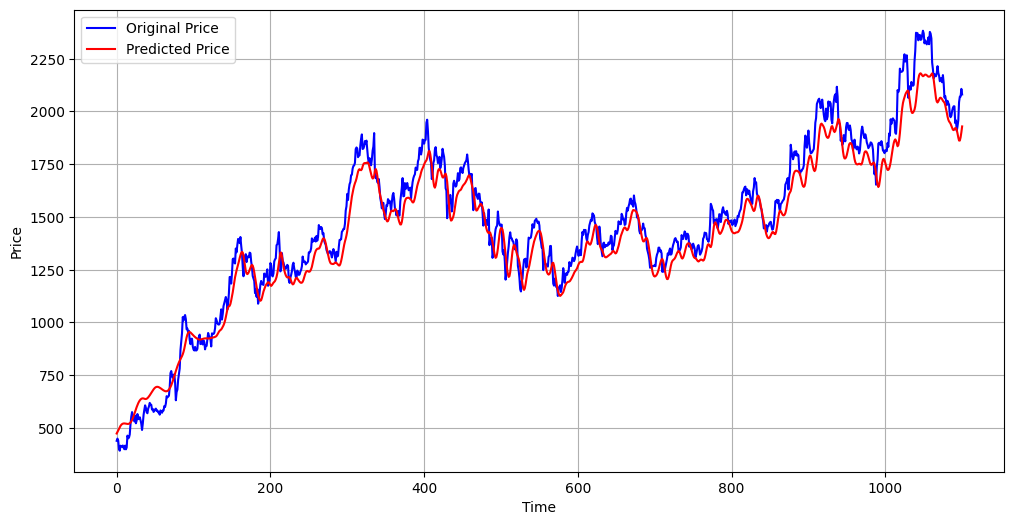

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 5.02%


Calculation of R2 score

In [ ]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.949318297853876


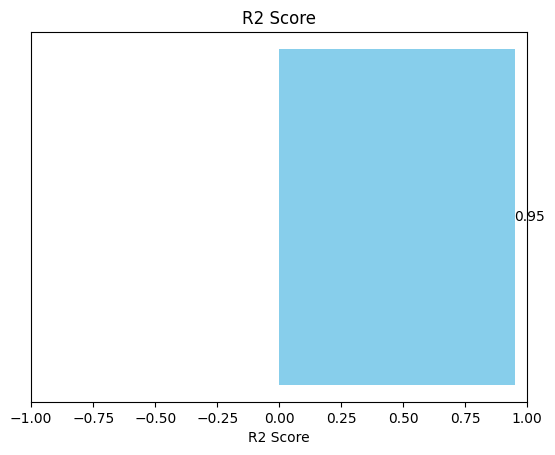

In [ ]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

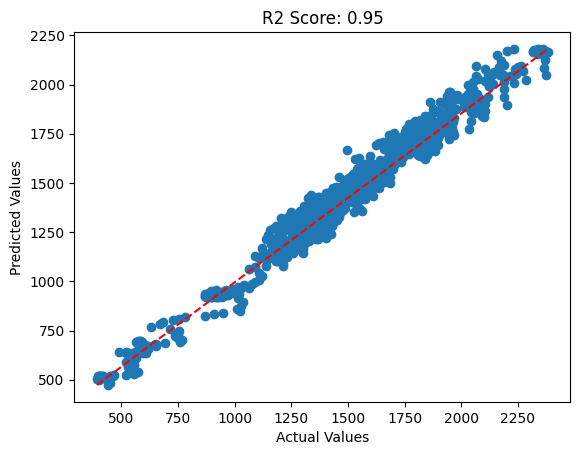

In [ ]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()

In [57]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 4.2 MB/s eta 0:00:30
    --------------------------------------- 1.8/124.9 MB 4.2 MB/s eta 0:00:30
    --------------------------------------- 2.9/124.9 MB 4.3 MB/s eta 0:00:29
   - -------------------------------------- 3.9/124.9 MB 4.4 MB/s eta 0:00:28
   - -------------------------------------- 5.0/124.9 MB 4.6 MB/s eta 0:00:27
   - -------------------------------------- 6.0/124.9 MB 4.6 MB/s eta 0:00:26
   -- ------------------------------------- 7.1/124.9 MB 4.7 MB/s eta 0:00:26
   -- ------------------------------------- 8.4/124.9 MB 4.8 MB/s eta 0:00:25
   --- ------------------------------------ 9.4/124.9 MB 4.8 MB/s eta 0:00:25
   --- ------------------------------------ 10.5/124.9 MB 4.8 MB/s eta 0:00:24
   --- ------------------------------------ 11.5/124.9 MB 4.8 MB/s eta 0:00:24
   ---- ----------------------------------- 12.6/124.9 MB 4.8 MB/s et


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
# Flatten x_train and x_test to fit the XGBoost format
X_train = x_train.reshape(x_train.shape[0], -1)  # Reshape to (n_samples, 100)
X_test = x_test.reshape(x_test.shape[0], -1)     # Reshape to (n_samples, 100)

Y_train = y_train  # Target remains the same for training
Y_test = y_test    # Target remains the same for testing


AttributeError: 'list' object has no attribute 'reshape'